Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.73      0.80      0.76        10

    accuracy                           0.91        57
   macro avg       0.84      0.87      0.85        57
weighted avg       0.92      0.91      0.91        57



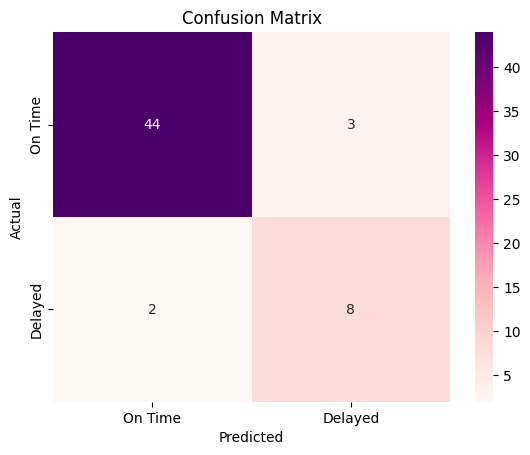

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn streamlit openpyxl

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (flights + weather)
def load_data(flight_path="/flight_delay_data.csv.xlsx"):
    # load flights
    df = pd.read_excel(flight_path, engine='openpyxl')

    # Create target: 1 = Delayed (>15 minutes), 0 = On Time
    df["DELAYED"] = (df["DEP_DELAY"] > 15).astype(int)

    df=pd.get_dummies(df, drop_first=True)

    return df

# Preprocess data
def preprocess_data(df):
    label_encoders = {}
    categorical_features = ['UNIQUE_CARRIER']

    for col in categorical_features:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

    # Create additional features from time
    # Suppose CRS_DEP_TIME is hhmm format integer
    df["CRS_DEP_HOUR"] = (df["CRS_DEP_TIME"] // 100) % 24
    df["CRS_ARR_HOUR"] = (df["CRS_ARR_TIME"] // 100) % 24

    # Suppose weather dataset gave TEMP, WIND_SPEED, PRECIP
    # fill missing weather values
    df["TEMP"] = df["TEMP"].fillna(df["TEMP"].median())
    df["WIND_SPEED"] = df["WIND_SPEED"].fillna(df["WIND_SPEED"].median())
    df["PRECIPITATION"] = df["PRECIPITATION"].fillna(0)



    # maybe add a flag severe weather
    df["SEVERE_WEATHER"] = (df["PRECIPITATION"] > 5) | (df["WIND_SPEED"] > 40)
    df["SEVERE_WEATHER"] = df["SEVERE_WEATHER"].astype(int)

    X = df[['MONTH', 'DAY_OF_MONTH',
            'CRS_DEP_HOUR', 'CRS_ARR_HOUR',
            'UNIQUE_CARRIER',
            'DISTANCE', 'TEMP', 'WIND_SPEED', 'PRECIPITATION', 'SEVERE_WEATHER']]
    y = df['DELAYED']

    return X, y, label_encoders

# Train model
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)
    return model, X_test, y_test

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
                xticklabels=['On Time', 'Delayed'],
                yticklabels=['On Time', 'Delayed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Flight Delay Prediction')
    plt.title('Confusion Matrix')
    plt.show()

# Run everything
def main():
    df = load_data()
    X, y, label_encoders = preprocess_data(df)
    model, X_test, y_test = train_model(X, y)
    evaluate_model(model, X_test, y_test)

if __name__ == "__main__":
    main()

In [ ]:
!ls

sample_data


!ls
